In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

# 1. Create Lattice

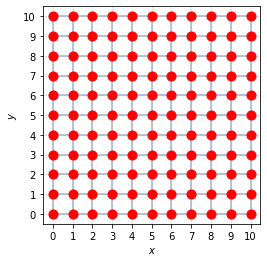

[(30, 31), (31, 32), (32, 33), (33, 34), (34, 35)]


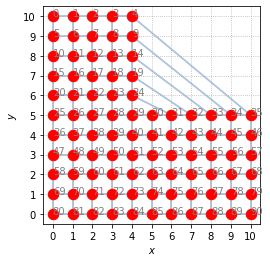

In [2]:
N = 11
lattice = SquareLattice(N, "open")
lattice.plot()
reciprocal_lattice_sites = lattice.get_reciprocal_sites()

ctr = 0
for i in range(N // 2):
    for j in range(N // 2, N):
        lattice.remove_site(i * N + j - ctr)
        ctr += 1

for i in range(N // 2):
    lattice.add_edge(
        (i * (N // 2) + N // 2 - 1, (N // 2) * (N // 2) + N - (i + 1)), (2, 0)
    )

flagged_edges = [(i, i + 1) for i in range(30, 35)]
print(flagged_edges)

lattice_sites = lattice.get_sites()
lattice_edges = lattice.get_edges()
num_sites = lattice.get_num_sites()
lattice.plot(True)

Lowest found energy:  0.04159891581792905
Index of lowest absolute energy:  181


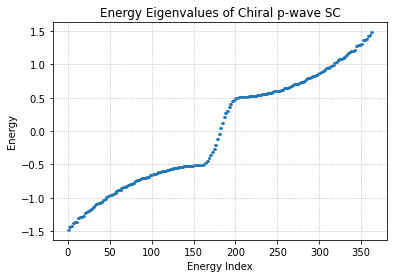

In [3]:
mu = 0.5
delta = complex(0.5, 0.0)

Ham_constructor = HamiltonianConstructor(mu, 0.5, 0.5, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

n = 0
hop_phase = np.exp(n * complex(0.0, 1.0) * np.pi / 2.0)
for flagged_edge in flagged_edges:
    Ham_constructor.add_tunneling_phase(
        H_direct_lattice, flagged_edge, hop_phase, num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)
print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

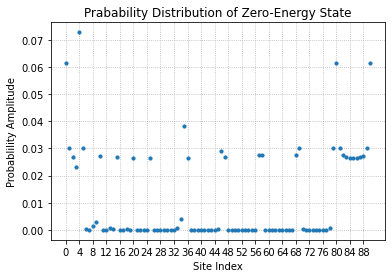

In [4]:
gs_wave_function = states[:, gs_idx]
gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
gs_probabilities = np.zeros(shape=(num_sites, 1))

for site_idx in range(num_sites):
    gs_probabilities[site_idx] = np.sum(gs_probabilities_nambu[block_indices[site_idx]])

plt.xlabel("Site Index")
plt.xticks(range(0, num_sites, num_sites // min(num_sites, 20)))
plt.ylabel("Probablility Amplitude")
plt.title("Prabability Distribution of Zero-Energy State")
plt.grid(linestyle=":", zorder=-10)
plt.scatter(range(num_sites), gs_probabilities, s=10, zorder=10)

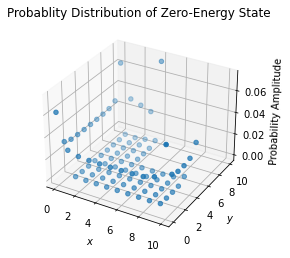

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x_values = [k[0] for k in lattice_sites]
y_values = [k[1] for k in lattice_sites]

plt.grid(linestyle=":")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel("Probability Amplitude")
ax.set_title("Probablity Distribution of Zero-Energy State")
ax.scatter(x_values, y_values, gs_probabilities)

## Hop phase results

### Including site nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04097816009540169

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.021916341743397627

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.021916341743398515

### Excluding site nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04097816009540169

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.019389934552859867

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.019389934552861643